In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
lista_regresion = []
lista_regresion.append(pd.read_csv("Dataframes/resultados_regresionSimbolica_it7000f.csv"))
lista_regresion.append(pd.read_csv("Dataframes/resultados_regresionSimbolicaC_it7000f.csv"))
lista_regresion.append(pd.read_csv("Dataframes/resultados_regresionSimbolicaCIMC_it3725f.csv"))
lista_regresion.append(pd.read_csv("Dataframes/resultados_regresionSimbolicaIMC_it7000f.csv"))

In [5]:
def pintarRegresion(df):
    batch_sizes = [4, 8, 12, 16, 32, 64, 128, 256]
    horas = [1,3,5,7,10,12,14,18,21]


    # Etiquetas y estilos
    labels = ["1 hora", "3 hora", "5 hora", "7 hora", "10 horas", "12 horas", "14 horas", "18 horas", "21 horas"]
    estilos = ['-'] * 9
    colores = sns.color_palette("husl", 9)            

    # Crear la figura
    plt.figure(figsize=(11, 7))
    plt.title("Comparación en función de las iteraciones)")

    sns.lineplot(data=df, x="iteracion", y="valor")

    plt.xlabel("Batch Size")
    plt.ylabel("Valor")
    plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

C:\Users\raulg\AppData\Local\Temp\ipykernel_5644\3322870502.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))


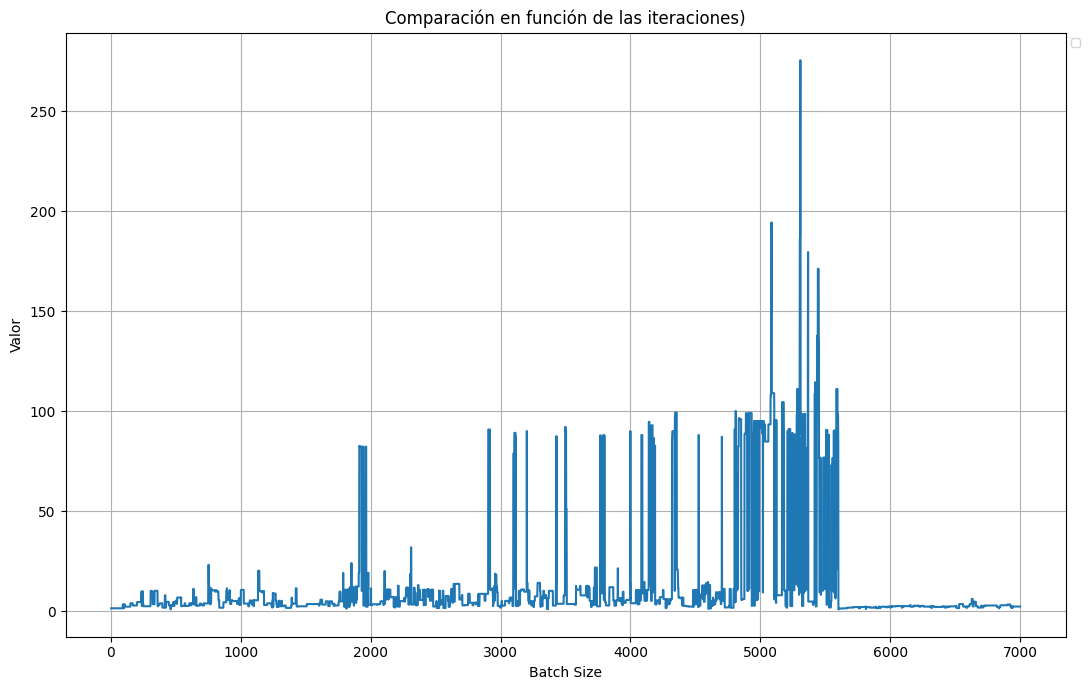

In [6]:
pintarRegresion(lista_regresion[0])

C:\Users\raulg\AppData\Local\Temp\ipykernel_5644\3322870502.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))


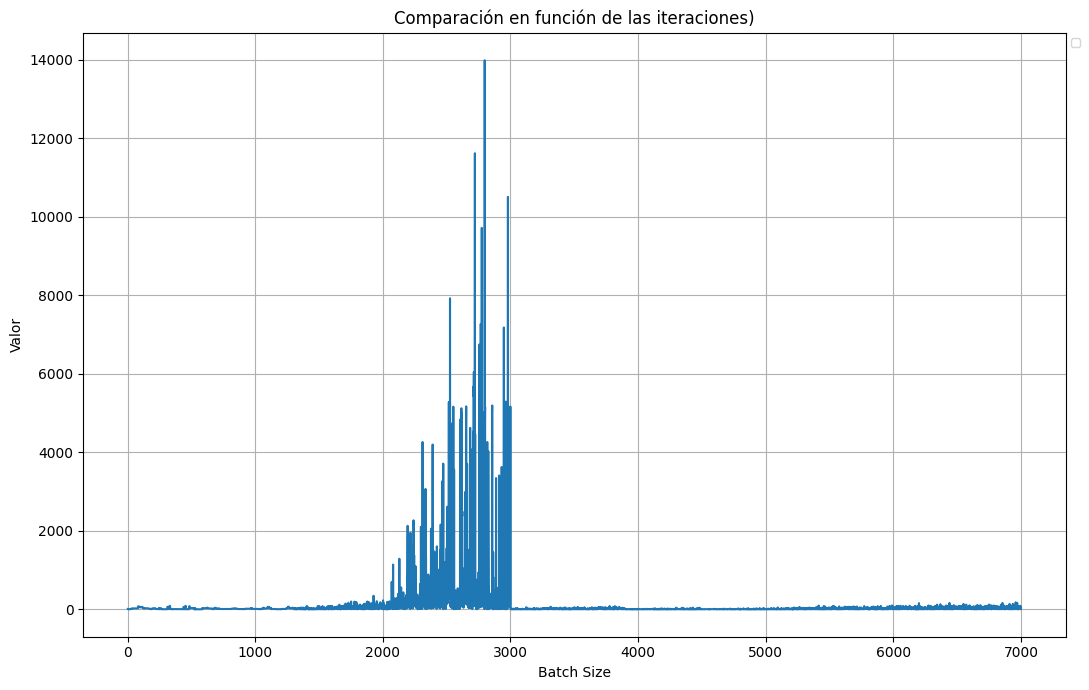

In [7]:
pintarRegresion(lista_regresion[1])

C:\Users\raulg\AppData\Local\Temp\ipykernel_5644\3322870502.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))


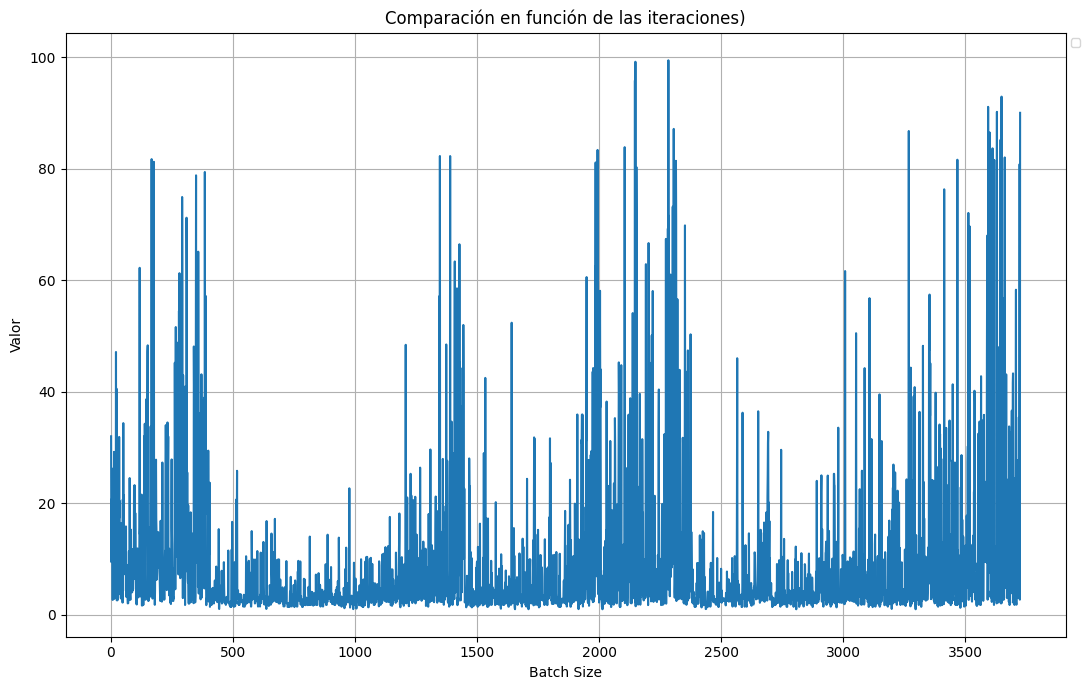

In [8]:
pintarRegresion(lista_regresion[2])

C:\Users\raulg\AppData\Local\Temp\ipykernel_5644\3322870502.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))


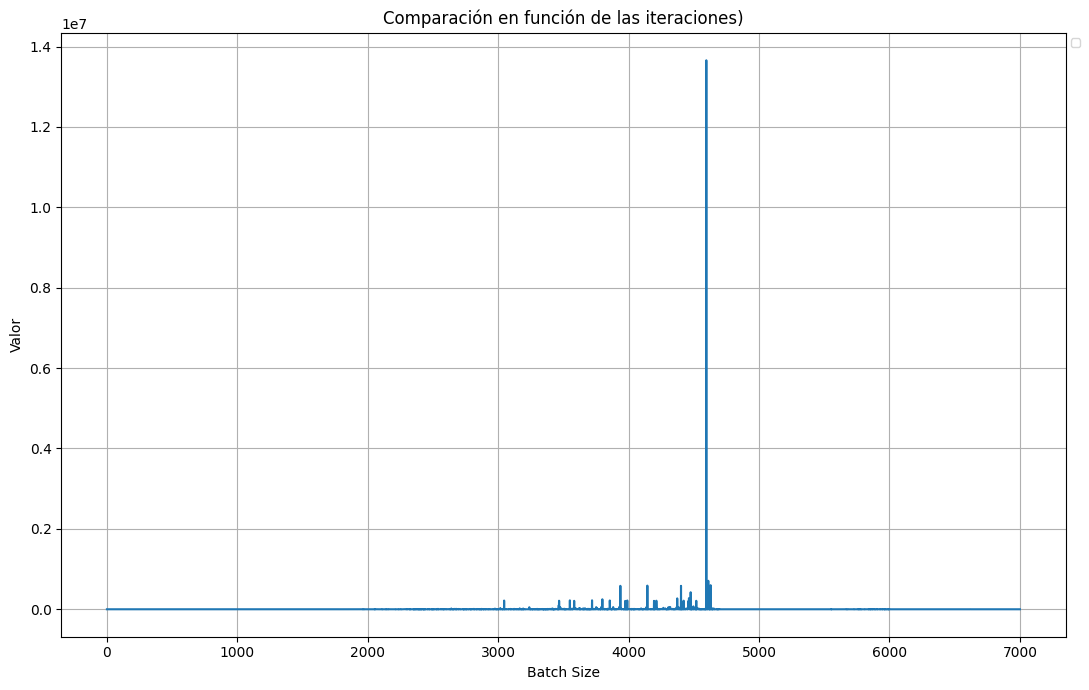

In [9]:
pintarRegresion(lista_regresion[3])

In [14]:
df_filtrado = lista_regresion[3][lista_regresion[3]['valor'] <= 1000]

In [15]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5756 entries, 0 to 6999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   iteracion      5756 non-null   int64  
 1   valor          5756 non-null   float64
 2   gen            5756 non-null   object 
 3   dataframe_idx  5756 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 224.8+ KB


C:\Users\raulg\AppData\Local\Temp\ipykernel_5644\3322870502.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))


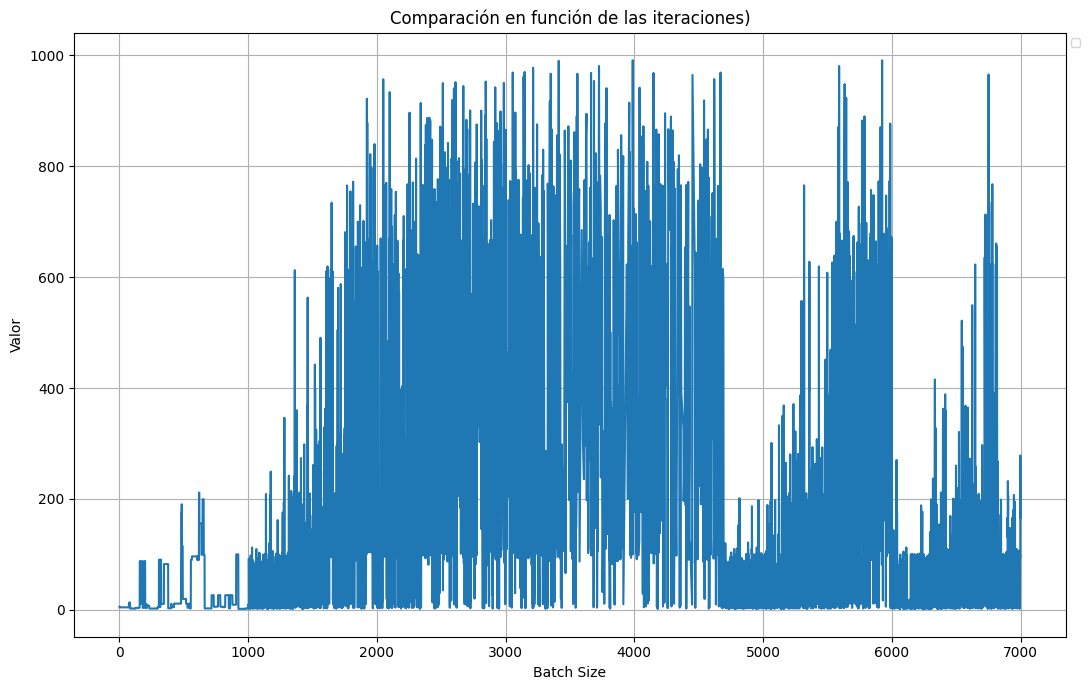

In [16]:
pintarRegresion(df_filtrado)

In [13]:
nombres_df = {  # Creo etiquetas descriptivas para cada dataFrame
    0: 'Sin IMC y sin constantes',
    1: 'Sin IMC y con constantes',
    2: 'Con IMC y con constantes',
    3: 'Con IMC y sin constantes',
}

for i, df in enumerate(lista_regresion): # Añad0 el índice del dataFrame a cada fila
    df['dataframe_idx'] = i
todos_df = pd.concat(lista_regresion, ignore_index=True)    # Combino los dataframes
todos_df = todos_df.drop_duplicates(subset='valor') # Elimino dupicados
top_10 = todos_df.sort_values(by='valor').head(10)  # Ordeno los valores y obtengo las diez mejores filas
top_10['dataframe_nombre'] = top_10['dataframe_idx'].map(nombres_df) # Creo una nueva columna que asocia índice con nombre
top_10 = top_10.drop(columns='dataframe_idx')   # Elimino la columna del índice
print("Top 10 mejores valores únicos:")
print(top_10)


Top 10 mejores valores únicos:
       iteracion     valor                                                gen  \
16807       2808  1.016758                                   p33 * p23 / p23    
457          458  1.016758                               10 - 10 + 27 * 5 / 5   
16013       2014  1.017357  p33 - p28 * p26 / p9 / c2.8692055465965627 / p...   
13196       6197  1.019015  c0.021105481531102366 / c3.601355288897536 / c...   
17296       3297  1.020025  p33 + p0 / p27 / p24 / c4.21720433656655 / p19...   
15655       1656  1.024885  c0.2959980396548151 / c2.3227683737431364 / p1...   
15710       1711  1.026408              p33 - c0.3768334312098537 / p3 / p19    
10109       3110  1.034252  p27 - c3.5847793623100923 + c3.911723678933262...   
23816       6092  1.043124                              33 - 31 / 17 / 2 / 29   
15915       1916  1.043896                               p33 + p2 / p9 / p34    

               dataframe_nombre  
16807  Con IMC y con constantes  
457    Si